# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy as ow
from citipy import citipy

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [13]:
# List for holding lat_lngs and cities
lat_lngs = []
print (lat_lngs)
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

[]


641

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [22]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# set up lists to hold reponse info
latitude = []
logitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    print (response)
    #latitude.append(response['coord']['lat'])
    #logitude.append(response['coord']['lon'])
    #temperature.append(response['main']['temp'])
    #humidity.append(response['main']['humidity'])
    #cloudiness.append(response['clouds']['all'])
    #wind_speed.append(response['wind']['speed'])


{'coord': {'lon': -134.97, 'lat': -23.12}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 25.29, 'pressure': 1011.74, 'humidity': 100, 'temp_min': 25.29, 'temp_max': 25.29, 'sea_level': 1011.74, 'grnd_level': 1011.68}, 'wind': {'speed': 3.31, 'deg': 115.001}, 'clouds': {'all': 48}, 'dt': 1553825000, 'sys': {'message': 0.0032, 'country': 'PF', 'sunrise': 1553785583, 'sunset': 1553828597}, 'id': 4030556, 'name': 'Rikitea', 'cod': 200}
{'coord': {'lon': 115.35, 'lat': -33.64}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 18.32, 'pressure': 1018, 'humidity': 34, 'temp_min': 17.22, 'temp_max': 19.44}, 'wind': {'speed': 7.01, 'deg': 120.001}, 'rain': {}, 'clouds': {'all': 0}, 'dt': 1553824899, 'sys': {'type': 3, 'id': 2011706, 'message': 0.0033, 'country': 'AU', 'sunrise': 1553812070, 'sunset': 1553854744}, 'id': 2075265, 'name': 'B

{'coord': {'lon': 6.12, 'lat': 62.58}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 8.1, 'pressure': 1010, 'humidity': 76, 'temp_min': 6.11, 'temp_max': 10}, 'visibility': 10000, 'wind': {'speed': 14.9, 'deg': 220}, 'rain': {'3h': 1.37}, 'clouds': {'all': 92}, 'dt': 1553824906, 'sys': {'type': 1, 'id': 1602, 'message': 0.0056, 'country': 'NO', 'sunrise': 1553836066, 'sunset': 1553883167}, 'id': 3141667, 'name': 'Roald', 'cod': 200}
{'coord': {'lon': 57.7, 'lat': -20.41}, 'weather': [{'id': 521, 'main': 'Rain', 'description': 'shower rain', 'icon': '09n'}], 'base': 'stations', 'main': {'temp': 25.46, 'pressure': 1010, 'humidity': 94, 'temp_min': 25, 'temp_max': 26}, 'visibility': 10000, 'wind': {'speed': 5.1, 'deg': 150}, 'clouds': {'all': 40}, 'dt': 1553824745, 'sys': {'type': 1, 'id': 2061, 'message': 0.0038, 'country': 'MU', 'sunrise': 1553825714, 'sunset': 1553868767}, 'id': 934322, 'name': 'Mahebourg', 'c

{'coord': {'lon': -97.91, 'lat': 29.74}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 19.97, 'pressure': 1018, 'humidity': 64, 'temp_min': 18.89, 'temp_max': 21.11}, 'visibility': 16093, 'wind': {'speed': 6.2, 'deg': 150}, 'clouds': {'all': 1}, 'dt': 1553824983, 'sys': {'type': 1, 'id': 3391, 'message': 0.0078, 'country': 'US', 'sunrise': 1553775958, 'sunset': 1553820437}, 'id': 4695361, 'name': 'Galle', 'cod': 200}
{'coord': {'lon': 74.49, 'lat': 15.34}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 21, 'pressure': 1015, 'humidity': 100, 'temp_min': 21, 'temp_max': 21}, 'visibility': 4000, 'wind': {'speed': 0.76, 'deg': 291.001}, 'clouds': {'all': 20}, 'dt': 1553821200, 'sys': {'type': 1, 'id': 9229, 'message': 0.0045, 'country': 'IN', 'sunrise': 1553821194, 'sunset': 1553865229}, 'id': 1273574, 'name': 'Vaini', 'cod': 200}
{'coor

{'coord': {'lon': -155.08, 'lat': 19.71}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 23.05, 'pressure': 1011, 'humidity': 73, 'temp_min': 22.22, 'temp_max': 24.44}, 'wind': {'speed': 0.89, 'deg': 56, 'gust': 2.68}, 'rain': {'3h': 0.51}, 'clouds': {'all': 20}, 'dt': 1553824709, 'sys': {'type': 3, 'id': 2002460, 'message': 0.0044, 'country': 'US', 'sunrise': 1553789841, 'sunset': 1553833989}, 'id': 5855927, 'name': 'Hilo', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
{'coord': {'lon': -73.75, 'lat': 42.65}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 8.04, 'pressure': 1021, 'humidity': 37, 'temp_min': 4.44, 'temp_max': 10.56}, 'visibility': 16093, 'wind': {'speed': 6.7, 'deg': 180}, 'clouds': {'all': 90}, 'dt': 1553824957, 'sys': {'type': 1, 'id': 3273, 'message': 0.0058, 'country': 'US', 'sunrise': 1553769874, 's

{'cod': '404', 'message': 'city not found'}
{'coord': {'lon': -62.99, 'lat': -40.81}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 22.49, 'pressure': 1015.74, 'humidity': 53, 'temp_min': 22.49, 'temp_max': 22.49, 'sea_level': 1015.74, 'grnd_level': 1012.16}, 'wind': {'speed': 7.76, 'deg': 342.001}, 'clouds': {'all': 0}, 'dt': 1553825013, 'sys': {'message': 0.0033, 'country': 'AR', 'sunrise': 1553768566, 'sunset': 1553811071}, 'id': 3832899, 'name': 'Viedma', 'cod': 200}
{'coord': {'lon': 129.68, 'lat': 49.74}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -0.37, 'pressure': 1018.5, 'humidity': 30, 'temp_min': -0.37, 'temp_max': -0.37, 'sea_level': 1018.5, 'grnd_level': 996.88}, 'wind': {'speed': 1.76, 'deg': 317.001}, 'clouds': {'all': 56}, 'dt': 1553825014, 'sys': {'message': 0.0029, 'country': 'RU', 'sunrise': 1553807171, 'sun

{'coord': {'lon': -135.01, 'lat': 68.22}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 3, 'pressure': 1022, 'humidity': 59, 'temp_min': 3, 'temp_max': 3}, 'visibility': 24140, 'wind': {'speed': 3.1, 'deg': 170}, 'clouds': {'all': 75}, 'dt': 1553821200, 'sys': {'type': 1, 'id': 796, 'message': 0.009, 'country': 'CA', 'sunrise': 1553783132, 'sunset': 1553831067}, 'id': 5882953, 'name': 'Aklavik', 'cod': 200}
{'coord': {'lon': -34.81, 'lat': -7.47}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 25, 'pressure': 1015, 'humidity': 94, 'temp_min': 25, 'temp_max': 25}, 'visibility': 10000, 'wind': {'speed': 2.1, 'deg': 250}, 'clouds': {'all': 0}, 'dt': 1553821200, 'sys': {'type': 1, 'id': 8391, 'message': 0.0031, 'country': 'BR', 'sunrise': 1553761347, 'sunset': 1553804766}, 'id': 3391889, 'name': 'Pitimbu', 'cod': 200}
{'coord': {'lon'

{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'coord': {'lon': 106.27, 'lat': 45.76}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': -3.72, 'pressure': 1024.9, 'humidity': 77, 'temp_min': -3.72, 'temp_max': -3.72, 'sea_level': 1024.9, 'grnd_level': 862.8}, 'wind': {'speed': 5.26, 'deg': 326.001}, 'clouds': {'all': 36}, 'dt': 1553825021, 'sys': {'message': 0.0037, 'country': 'MN', 'sunrise': 1553812921, 'sunset': 1553858251}, 'id': 2030065, 'name': 'Mandalgovi', 'cod': 200}
{'coord': {'lon': -97.86, 'lat': 55.74}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -5, 'pressure': 1016, 'humidity': 49, 'temp_min': -5, 'temp_max': -5}, 'visibility': 24140, 'wind': {'speed': 2.1, 'deg': 20}, 'clouds': {'all': 75}, 'dt': 1553821200, 'sys': {'type': 1, 'id': 935, 'message': 0.0044, 'country'

{'coord': {'lon': -0.61, 'lat': 44.83}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 7.01, 'pressure': 1026, 'humidity': 70, 'temp_min': 6.11, 'temp_max': 8}, 'visibility': 10000, 'wind': {'speed': 1.5}, 'clouds': {'all': 0}, 'dt': 1553824942, 'sys': {'type': 1, 'id': 6450, 'message': 0.0041, 'country': 'FR', 'sunrise': 1553838568, 'sunset': 1553883895}, 'id': 3031582, 'name': 'Saint-Augustin', 'cod': 200}
{'coord': {'lon': 66.17, 'lat': 57.67}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 0.04, 'pressure': 1010.5, 'humidity': 97, 'temp_min': 0.04, 'temp_max': 0.04, 'sea_level': 1010.5, 'grnd_level': 1001.68}, 'wind': {'speed': 5.81, 'deg': 104.501}, 'clouds': {'all': 92}, 'dt': 1553825026, 'sys': {'message': 0.0032, 'country': 'RU', 'sunrise': 1553822018, 'sunset': 1553868398}, 'id': 1497376, 'name': 'Nizhnyaya Tavda', 'cod'

{'coord': {'lon': -39.92, 'lat': -2.92}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 23.79, 'pressure': 1012.98, 'humidity': 96, 'temp_min': 23.79, 'temp_max': 23.79, 'sea_level': 1012.98, 'grnd_level': 1007.44}, 'wind': {'speed': 1.86, 'deg': 104.001}, 'clouds': {'all': 64}, 'dt': 1553825029, 'sys': {'message': 0.0038, 'country': 'BR', 'sunrise': 1553762519, 'sunset': 1553806047}, 'id': 3393692, 'name': 'Itarema', 'cod': 200}
{'coord': {'lon': 59.73, 'lat': 52.08}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 0.69, 'pressure': 1007.94, 'humidity': 96, 'temp_min': 0.69, 'temp_max': 0.69, 'sea_level': 1007.94, 'grnd_level': 965.76}, 'wind': {'speed': 4.31, 'deg': 300.501}, 'clouds': {'all': 80}, 'dt': 1553825029, 'sys': {'message': 0.004, 'country': 'RU', 'sunrise': 1553823838, 'sunset': 1553869668}, 'id': 537541, 'name': 

{'coord': {'lon': -94.42, 'lat': 30.04}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 18.53, 'pressure': 1021, 'humidity': 72, 'temp_min': 17.22, 'temp_max': 19.44}, 'visibility': 16093, 'wind': {'speed': 3.1, 'deg': 140}, 'clouds': {'all': 40}, 'dt': 1553825010, 'sys': {'type': 1, 'id': 3476, 'message': 0.0088, 'country': 'US', 'sunrise': 1553775115, 'sunset': 1553819605}, 'id': 4732862, 'name': 'Nome', 'cod': 200}
{'coord': {'lon': -99.65, 'lat': 37.17}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 8.89, 'pressure': 1012, 'humidity': 88, 'temp_min': 8.89, 'temp_max': 8.89}, 'wind': {'speed': 2.24, 'deg': 122, 'gust': 8.05}, 'clouds': {'all': 12}, 'dt': 1553824811, 'sys': {'type': 3, 'id': 2005167, 'message': 0.0036, 'country': 'US', 'sunrise': 1553776220, 'sunset': 1553821010}, 'id': 4267710, 'name': 'Sitka', 'cod': 200}

{'coord': {'lon': -137.51, 'lat': 60.75}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 2.54, 'pressure': 1021.74, 'humidity': 53, 'temp_min': 2.54, 'temp_max': 2.54, 'sea_level': 1021.74, 'grnd_level': 893.76}, 'wind': {'speed': 1.16, 'deg': 203.501}, 'clouds': {'all': 0}, 'dt': 1553825039, 'sys': {'message': 0.0038, 'country': 'CA', 'sunrise': 1553784388, 'sunset': 1553831010}, 'id': 5969025, 'name': 'Haines Junction', 'cod': 200}
{'coord': {'lon': -37.64, 'lat': 65.61}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': -8, 'pressure': 997, 'humidity': 57, 'temp_min': -8, 'temp_max': -8}, 'wind': {'speed': 6.2, 'deg': 50}, 'clouds': {'all': 8}, 'dt': 1553820600, 'sys': {'type': 1, 'id': 81, 'message': 0.004, 'country': 'GL', 'sunrise': 1553760099, 'sunset': 1553807373}, 'id': 3424607, 'name': 'Tasiilaq', 'cod': 200}
{'coord': {'lon': 14

{'coord': {'lon': 102.25, 'lat': 27.88}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 23.3, 'pressure': 842, 'humidity': 20, 'temp_min': 21.67, 'temp_max': 25}, 'wind': {'speed': 0.71, 'deg': 112.501}, 'rain': {'3h': 0.005}, 'clouds': {'all': 0}, 'dt': 1553824955, 'sys': {'type': 3, 'id': 145396, 'message': 0.0044, 'country': 'CN', 'sunrise': 1553814323, 'sunset': 1553858778}, 'id': 1789647, 'name': 'Xichang', 'cod': 200}
{'coord': {'lon': 92.78, 'lat': 23.28}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 22.54, 'pressure': 1012.34, 'humidity': 66, 'temp_min': 22.54, 'temp_max': 22.54, 'sea_level': 1012.34, 'grnd_level': 914.8}, 'wind': {'speed': 1.06, 'deg': 111.501}, 'clouds': {'all': 0}, 'dt': 1553825044, 'sys': {'message': 0.0036, 'country': 'IN', 'sunrise': 1553816678, 'sunset': 1553860968}, 'id': 1254609, 'name': 'Thenzawl', '

{'coord': {'lon': 102.51, 'lat': 12.25}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 29.59, 'pressure': 1011, 'humidity': 88, 'temp_min': 27, 'temp_max': 31.11}, 'visibility': 6000, 'wind': {'speed': 1.5, 'deg': 50}, 'clouds': {'all': 20}, 'dt': 1553824964, 'sys': {'type': 1, 'id': 9245, 'message': 0.004, 'country': 'TH', 'sunrise': 1553814519, 'sunset': 1553858457}, 'id': 1605279, 'name': 'Trat', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
{'coord': {'lon': 70.83, 'lat': 66.83}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -3.87, 'pressure': 1013.62, 'humidity': 88, 'temp_min': -3.87, 'temp_max': -3.87, 'sea_level': 1013.62, 'grnd_level': 1012.4}, 'wind': {'speed': 5.51, 'deg': 220.501}, 'clouds': {'all': 76}, 'dt': 1553825048, 'sys': {'message': 0.0041, 'country': 'RU', 'sunrise': 1553820180, 'sunset': 15538679

{'coord': {'lon': 119.7, 'lat': 49.2}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': -1.72, 'pressure': 1018.62, 'humidity': 33, 'temp_min': -1.72, 'temp_max': -1.72, 'sea_level': 1018.62, 'grnd_level': 935.92}, 'wind': {'speed': 3.21, 'deg': 33.0006}, 'clouds': {'all': 0}, 'dt': 1553825051, 'sys': {'message': 0.0035, 'country': 'CN', 'sunrise': 1553809583, 'sunset': 1553855144}, 'id': 2037078, 'name': 'Hailar', 'cod': 200}
{'coord': {'lon': 46.72, 'lat': 24.63}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 15, 'pressure': 1020, 'humidity': 51, 'temp_min': 15, 'temp_max': 15}, 'visibility': 10000, 'wind': {'speed': 2.01, 'deg': 77.5006}, 'clouds': {'all': 0}, 'dt': 1553821200, 'sys': {'type': 1, 'id': 7424, 'message': 0.0031, 'country': 'SA', 'sunrise': 1553827701, 'sunset': 1553872049}, 'id': 108410, 'name': 'Riyadh', 'cod': 200}
{'

{'coord': {'lon': 153.24, 'lat': -28.95}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 25.61, 'pressure': 1014, 'humidity': 65, 'temp_min': 24.44, 'temp_max': 26}, 'visibility': 200, 'wind': {'speed': 2.6, 'deg': 130}, 'clouds': {'all': 75}, 'dt': 1553824943, 'sys': {'type': 1, 'id': 9537, 'message': 0.0058, 'country': 'AU', 'sunrise': 1553802900, 'sunset': 1553845731}, 'id': 2160063, 'name': 'Codrington', 'cod': 200}
{'coord': {'lon': 36.63, 'lat': 37.03}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 10.17, 'pressure': 1016, 'humidity': 76, 'temp_min': 8.89, 'temp_max': 11.67}, 'visibility': 10000, 'wind': {'speed': 1}, 'clouds': {'all': 75}, 'dt': 1553825013, 'sys': {'type': 1, 'id': 7002, 'message': 0.0037, 'country': 'TR', 'sunrise': 1553829860, 'sunset': 1553874732}, 'id': 311104, 'name': 'Islahiye', 'cod': 200}
{'coo

{'coord': {'lon': -79.3, 'lat': -6.85}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 23, 'pressure': 1013, 'humidity': 73, 'temp_min': 23, 'temp_max': 23}, 'visibility': 10000, 'wind': {'speed': 5.7, 'deg': 180}, 'clouds': {'all': 75}, 'dt': 1553821200, 'sys': {'type': 1, 'id': 8680, 'message': 0.004, 'country': 'PE', 'sunrise': 1553772016, 'sunset': 1553815447}, 'id': 3694197, 'name': 'Oyotun', 'cod': 200}
{'coord': {'lon': -147.72, 'lat': 64.84}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 5.64, 'pressure': 1021, 'humidity': 86, 'temp_min': 4.44, 'temp_max': 7.22}, 'visibility': 16093, 'wind': {'speed': 3.11, 'deg': 265.001}, 'clouds': {'all': 90}, 'dt': 1553824627, 'sys': {'type': 1, 'id': 7684, 'message': 0.0045, 'country': 'US', 'sunrise': 1553786519, 'sunset': 1553833780}, 'id': 5861897, 'name': 'Fairbanks', 'cod'

{'coord': {'lon': -9.45, 'lat': 38.8}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 13.64, 'pressure': 1020, 'humidity': 54, 'temp_min': 10, 'temp_max': 16.11}, 'visibility': 10000, 'wind': {'speed': 1, 'deg': 350}, 'clouds': {'all': 0}, 'dt': 1553824921, 'sys': {'type': 1, 'id': 6901, 'message': 0.004, 'country': 'PT', 'sunrise': 1553840863, 'sunset': 1553885843}, 'id': 2269142, 'name': 'Colares', 'cod': 200}
{'coord': {'lon': -73.76, 'lat': -42.48}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 8, 'pressure': 1019, 'humidity': 100, 'temp_min': 8, 'temp_max': 8}, 'wind': {'speed': 1.5, 'deg': 340}, 'clouds': {'all': 0}, 'dt': 1553821200, 'sys': {'type': 1, 'id': 8512, 'message': 0.0035, 'country': 'CL', 'sunrise': 1553771183, 'sunset': 1553813622}, 'id': 3896218, 'name': 'Castro', 'cod': 200}
{'coord': {'lon': -89.58, 'lat': 40.67},

{'coord': {'lon': 159.59, 'lat': -8.15}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 31.44, 'pressure': 1005.18, 'humidity': 70, 'temp_min': 31.44, 'temp_max': 31.44, 'sea_level': 1005.18, 'grnd_level': 996.16}, 'wind': {'speed': 3.46, 'deg': 246.001}, 'clouds': {'all': 24}, 'dt': 1553825065, 'sys': {'message': 0.0035, 'country': 'SB', 'sunrise': 1553801097, 'sunset': 1553844487}, 'id': 2109528, 'name': 'Buala', 'cod': 200}
{'coord': {'lon': 76.86, 'lat': 43.36}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 8, 'pressure': 1016, 'humidity': 87, 'temp_min': 8, 'temp_max': 8}, 'visibility': 10000, 'wind': {'speed': 1, 'deg': 40}, 'clouds': {'all': 20}, 'dt': 1553823000, 'sys': {'type': 1, 'id': 8818, 'message': 0.0039, 'country': 'KZ', 'sunrise': 1553820045, 'sunset': 1553865241}, 'id': 1526384, 'name': 'Boralday', 'cod': 200}
{'c

{'coord': {'lon': 161.92, 'lat': -10.46}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 28.29, 'pressure': 1004.94, 'humidity': 100, 'temp_min': 28.29, 'temp_max': 28.29, 'sea_level': 1004.94, 'grnd_level': 1002}, 'wind': {'speed': 0.76, 'deg': 235.501}, 'clouds': {'all': 20}, 'dt': 1553825069, 'sys': {'message': 0.0035, 'country': 'SB', 'sunrise': 1553800567, 'sunset': 1553843899}, 'id': 2178753, 'name': 'Kirakira', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
{'coord': {'lon': -9.73, 'lat': 29.7}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 12.14, 'pressure': 1017.06, 'humidity': 94, 'temp_min': 12.14, 'temp_max': 12.14, 'sea_level': 1017.06, 'grnd_level': 998.56}, 'wind': {'speed': 1.51, 'deg': 119.501}, 'clouds': {'all': 0}, 'dt': 1553824971, 'sys': {'message': 0.0033, 'country': 'MA', 'sunrise': 1553841141, 'sunset

{'coord': {'lon': 161.3, 'lat': 68.75}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': -16.32, 'pressure': 1020.34, 'humidity': 85, 'temp_min': -16.32, 'temp_max': -16.32, 'sea_level': 1020.34, 'grnd_level': 1011.92}, 'wind': {'speed': 3.41, 'deg': 188.501}, 'clouds': {'all': 48}, 'dt': 1553825072, 'sys': {'message': 0.0036, 'country': 'RU', 'sunrise': 1553798307, 'sunset': 1553846457}, 'id': 2126199, 'name': 'Cherskiy', 'cod': 200}
{'coord': {'lon': 7.39, 'lat': 18.74}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 20.99, 'pressure': 1012.22, 'humidity': 30, 'temp_min': 20.99, 'temp_max': 20.99, 'sea_level': 1012.22, 'grnd_level': 960.8}, 'wind': {'speed': 1.51, 'deg': 92.5006}, 'clouds': {'all': 48}, 'dt': 1553825072, 'sys': {'message': 0.0029, 'country': 'NE', 'sunrise': 1553837235, 'sunset': 1553881389}, 'id': 24475

{'coord': {'lon': 140.4, 'lat': -8.49}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 27.54, 'pressure': 1007.58, 'humidity': 100, 'temp_min': 27.54, 'temp_max': 27.54, 'sea_level': 1007.58, 'grnd_level': 1007.12}, 'wind': {'speed': 5.71, 'deg': 314.501}, 'rain': {'3h': 3.055}, 'clouds': {'all': 64}, 'dt': 1553825075, 'sys': {'message': 0.0066, 'country': 'ID', 'sunrise': 1553805707, 'sunset': 1553849087}, 'id': 2082539, 'name': 'Merauke', 'cod': 200}
{'coord': {'lon': 125.41, 'lat': -8.93}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 26.04, 'pressure': 1009.34, 'humidity': 83, 'temp_min': 26.04, 'temp_max': 26.04, 'sea_level': 1009.34, 'grnd_level': 933.76}, 'wind': {'speed': 0.86, 'deg': 235.001}, 'rain': {'3h': 0.96}, 'clouds': {'all': 44}, 'dt': 1553825076, 'sys': {'message': 0.0031, 'country': 'TL', 'sunrise': 1553809310, 's

{'coord': {'lon': 22.82, 'lat': 4.74}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 23.14, 'pressure': 1009.66, 'humidity': 83, 'temp_min': 23.14, 'temp_max': 23.14, 'sea_level': 1009.66, 'grnd_level': 952.32}, 'wind': {'speed': 1.41, 'deg': 43.5006}, 'clouds': {'all': 8}, 'dt': 1553825079, 'sys': {'message': 0.0033, 'country': 'CF', 'sunrise': 1553833745, 'sunset': 1553877474}, 'id': 240498, 'name': 'Bangassou', 'cod': 200}
{'coord': {'lon': -147.8, 'lat': 64.86}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 5.58, 'pressure': 1021, 'humidity': 86, 'temp_min': 3.89, 'temp_max': 7.22}, 'visibility': 16093, 'wind': {'speed': 3.11, 'deg': 265.001}, 'clouds': {'all': 90}, 'dt': 1553825046, 'sys': {'type': 1, 'id': 7684, 'message': 0.0048, 'country': 'US', 'sunrise': 1553786536, 'sunset': 1553833801}, 'id': 5859699, 'name': 'Colle

{'coord': {'lon': -53.67, 'lat': 66.94}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': -18.17, 'pressure': 1011.9, 'humidity': 75, 'temp_min': -18.17, 'temp_max': -18.17, 'sea_level': 1011.9, 'grnd_level': 974.32}, 'wind': {'speed': 0.66, 'deg': 83.5006}, 'clouds': {'all': 44}, 'dt': 1553824900, 'sys': {'message': 0.0038, 'country': 'GL', 'sunrise': 1553763807, 'sunset': 1553811357}, 'id': 3419842, 'name': 'Sisimiut', 'cod': 200}
{'coord': {'lon': -127.42, 'lat': 50.7}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 13, 'pressure': 1022, 'humidity': 54, 'temp_min': 13, 'temp_max': 13}, 'visibility': 32186, 'wind': {'speed': 4.6, 'deg': 320}, 'clouds': {'all': 75}, 'dt': 1553821200, 'sys': {'type': 1, 'id': 1011, 'message': 0.0083, 'country': 'CA', 'sunrise': 1553782476, 'sunset': 1553828080}, 'id': 6111862, 'name': 'Port H

{'coord': {'lon': 133.88, 'lat': -23.7}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 28, 'pressure': 1013, 'humidity': 17, 'temp_min': 28, 'temp_max': 28}, 'visibility': 10000, 'wind': {'speed': 3.1, 'deg': 160}, 'clouds': {'all': 0}, 'dt': 1553823000, 'sys': {'type': 1, 'id': 9483, 'message': 0.0032, 'country': 'AU', 'sunrise': 1553807472, 'sunset': 1553850450}, 'id': 2077895, 'name': 'Alice Springs', 'cod': 200}
{'coord': {'lon': -76.39, 'lat': -11.84}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 4.54, 'pressure': 1013.02, 'humidity': 98, 'temp_min': 4.54, 'temp_max': 4.54, 'sea_level': 1013.02, 'grnd_level': 634.64}, 'wind': {'speed': 0.21, 'deg': 347.001}, 'rain': {'3h': 2.395}, 'clouds': {'all': 80}, 'dt': 1553825087, 'sys': {'message': 0.0029, 'country': 'PE', 'sunrise': 1553771379, 'sunset': 1553814688}, 'id': 3935155, 'nam

{'coord': {'lon': -97.12, 'lat': 44.9}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 0.78, 'pressure': 1023, 'humidity': 69, 'temp_min': -0.57, 'temp_max': 2}, 'visibility': 16093, 'wind': {'speed': 4.6, 'deg': 350}, 'clouds': {'all': 75}, 'dt': 1553824845, 'sys': {'type': 1, 'id': 3343, 'message': 0.0065, 'country': 'US', 'sunrise': 1553775411, 'sunset': 1553820604}, 'id': 5232741, 'name': 'Watertown', 'cod': 200}
{'coord': {'lon': 9.26, 'lat': -1.57}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 28.29, 'pressure': 1009.7, 'humidity': 100, 'temp_min': 28.29, 'temp_max': 28.29, 'sea_level': 1009.7, 'grnd_level': 1009.68}, 'wind': {'speed': 4.46, 'deg': 222.501}, 'rain': {'3h': 0.72}, 'clouds': {'all': 88}, 'dt': 1553825091, 'sys': {'message': 0.0035, 'country': 'GA', 'sunrise': 1553837085, 'sunset': 1553880642}, 'id': 2396853, 

{'coord': {'lon': 167.88, 'lat': -21.55}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 25.34, 'pressure': 1009.38, 'humidity': 100, 'temp_min': 25.34, 'temp_max': 25.34, 'sea_level': 1009.38, 'grnd_level': 1008.8}, 'wind': {'speed': 5.01, 'deg': 92.0006}, 'rain': {'3h': 0.615}, 'clouds': {'all': 100}, 'dt': 1553825095, 'sys': {'message': 0.0036, 'country': 'NC', 'sunrise': 1553799281, 'sunset': 1553842325}, 'id': 2138285, 'name': 'Tadine', 'cod': 200}
{'coord': {'lon': 61.49, 'lat': 31.03}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 17.39, 'pressure': 1013.02, 'humidity': 54, 'temp_min': 17.39, 'temp_max': 17.39, 'sea_level': 1013.02, 'grnd_level': 952.56}, 'wind': {'speed': 6.91, 'deg': 256.001}, 'clouds': {'all': 0}, 'dt': 1553825095, 'sys': {'message': 0.0038, 'country': 'IR', 'sunrise': 1553824035, 'sunset': 1553868627}, 'id':

{'coord': {'lon': -121.66, 'lat': 36.67}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 12.93, 'pressure': 1024, 'humidity': 87, 'temp_min': 9.44, 'temp_max': 16}, 'visibility': 16093, 'wind': {'speed': 4.6, 'deg': 260}, 'clouds': {'all': 1}, 'dt': 1553824899, 'sys': {'type': 1, 'id': 6269, 'message': 0.0068, 'country': 'US', 'sunrise': 1553781509, 'sunset': 1553826284}, 'id': 5391295, 'name': 'Salinas', 'cod': 200}
{'coord': {'lon': -13.05, 'lat': 20.52}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 15.24, 'pressure': 1012.42, 'humidity': 89, 'temp_min': 15.24, 'temp_max': 15.24, 'sea_level': 1012.42, 'grnd_level': 982.4}, 'wind': {'speed': 0.71, 'deg': 164.001}, 'clouds': {'all': 0}, 'dt': 1553825100, 'sys': {'message': 0.0044, 'country': 'MR', 'sunrise': 1553842108, 'sunset': 1553886325}, 'id': 2381334, 'name': 'Atar', 'cod': 200}

{'coord': {'lon': 100.33, 'lat': 5.42}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 27.84, 'pressure': 1010, 'humidity': 89, 'temp_min': 26.67, 'temp_max': 29}, 'visibility': 6000, 'wind': {'speed': 1}, 'clouds': {'all': 75}, 'dt': 1553823000, 'sys': {'type': 1, 'id': 9438, 'message': 0.0045, 'country': 'MY', 'sunrise': 1553815139, 'sunset': 1553858884}, 'id': 1735106, 'name': 'George Town', 'cod': 200}
{'coord': {'lon': 7.87, 'lat': 50.79}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 3.52, 'pressure': 1034, 'humidity': 93, 'temp_min': 0, 'temp_max': 7.22}, 'visibility': 10000, 'wind': {'speed': 0.5}, 'clouds': {'all': 0}, 'dt': 1553825086, 'sys': {'type': 1, 'id': 1271, 'message': 0.0064, 'country': 'DE', 'sunrise': 1553836319, 'sunset': 1553882074}, 'id': 2949669, 'name': 'Betzdorf', 'cod': 200}
{'coord': {'lon': -67.09, 'l

{'coord': {'lon': 61.16, 'lat': 36.54}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 12, 'pressure': 1018, 'humidity': 93, 'temp_min': 12, 'temp_max': 12}, 'wind': {'speed': 1, 'deg': 250}, 'rain': {'3h': 2.26}, 'clouds': {'all': 92}, 'dt': 1553821200, 'sys': {'type': 1, 'id': 7484, 'message': 0.0042, 'country': 'TM', 'sunrise': 1553823991, 'sunset': 1553868829}, 'id': 1159716, 'name': 'Sarakhs', 'cod': 200}
{'coord': {'lon': 139.49, 'lat': -20.73}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 27, 'pressure': 1010, 'humidity': 65, 'temp_min': 27, 'temp_max': 27}, 'visibility': 10000, 'wind': {'speed': 3.1, 'deg': 170}, 'clouds': {'all': 90}, 'dt': 1553823000, 'sys': {'type': 1, 'id': 9495, 'message': 0.0033, 'country': 'AU', 'sunrise': 1553806085, 'sunset': 1553849145}, 'id': 2065594, 'name': 'Mount Isa', 'cod': 200}
{'coord'

{'coord': {'lon': -151.75, 'lat': -16.48}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 29.44, 'pressure': 1009.02, 'humidity': 100, 'temp_min': 29.44, 'temp_max': 29.44, 'sea_level': 1009.02, 'grnd_level': 1008.88}, 'wind': {'speed': 0.86, 'deg': 283.001}, 'clouds': {'all': 0}, 'dt': 1553825112, 'sys': {'message': 0.0044, 'country': 'PF', 'sunrise': 1553789524, 'sunset': 1553832708}, 'id': 4034551, 'name': 'Faanui', 'cod': 200}
{'coord': {'lon': 113.68, 'lat': -7.74}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 27.99, 'pressure': 1010.46, 'humidity': 92, 'temp_min': 27.99, 'temp_max': 27.99, 'sea_level': 1010.46, 'grnd_level': 975.04}, 'wind': {'speed': 1.41, 'deg': 151.001}, 'clouds': {'all': 36}, 'dt': 1553825112, 'sys': {'message': 0.0027, 'country': 'ID', 'sunrise': 1553812109, 'sunset': 1553855507}, 'id': 1648918, 'na

{'coord': {'lon': -88.19, 'lat': 32.58}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 15, 'pressure': 1023, 'humidity': 67, 'temp_min': 12, 'temp_max': 18}, 'visibility': 16093, 'wind': {'speed': 1.96, 'deg': 166.501}, 'clouds': {'all': 1}, 'dt': 1553824889, 'sys': {'type': 1, 'id': 4866, 'message': 0.0028, 'country': 'US', 'sunrise': 1553773572, 'sunset': 1553818159}, 'id': 4073383, 'name': 'Livingston', 'cod': 200}
{'coord': {'lon': -72.85, 'lat': 40.77}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 5.83, 'pressure': 1025, 'humidity': 75, 'temp_min': 4.44, 'temp_max': 7.22}, 'visibility': 16093, 'wind': {'speed': 1.5, 'deg': 180}, 'clouds': {'all': 1}, 'dt': 1553825013, 'sys': {'type': 1, 'id': 3409, 'message': 0.0082, 'country': 'US', 'sunrise': 1553769708, 'sunset': 1553814661}, 'id': 5126209, 'name': 'Mastic Beach', 'cod': 200}

{'coord': {'lon': 92.75, 'lat': 11.67}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 28.64, 'pressure': 1011.34, 'humidity': 100, 'temp_min': 28.64, 'temp_max': 28.64, 'sea_level': 1011.34, 'grnd_level': 1011.04}, 'wind': {'speed': 1.16, 'deg': 46.0006}, 'clouds': {'all': 0}, 'dt': 1553824890, 'sys': {'message': 0.0041, 'country': 'IN', 'sunrise': 1553816869, 'sunset': 1553860791}, 'id': 1259385, 'name': 'Port Blair', 'cod': 200}
{'coord': {'lon': -52.9, 'lat': 65.42}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': -10.12, 'pressure': 1011.9, 'humidity': 68, 'temp_min': -10.12, 'temp_max': -10.12, 'sea_level': 1011.9, 'grnd_level': 997.52}, 'wind': {'speed': 5.66, 'deg': 102.501}, 'clouds': {'all': 0}, 'dt': 1553825120, 'sys': {'message': 0.0037, 'country': 'GL', 'sunrise': 1553763769, 'sunset': 1553811026}, 'id': 3421982, 'name': 'Ma

{'coord': {'lon': -84.27, 'lat': 36.01}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 12.36, 'pressure': 1024, 'humidity': 71, 'temp_min': 8.89, 'temp_max': 16}, 'visibility': 16093, 'wind': {'speed': 2.76, 'deg': 221.001}, 'clouds': {'all': 1}, 'dt': 1553825015, 'sys': {'type': 1, 'id': 3818, 'message': 0.0054, 'country': 'US', 'sunrise': 1553772559, 'sunset': 1553817290}, 'id': 4646571, 'name': 'Oak Ridge', 'cod': 200}
{'coord': {'lon': 14.2, 'lat': 36.06}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 12.31, 'pressure': 1019, 'humidity': 82, 'temp_min': 11.67, 'temp_max': 13}, 'visibility': 10000, 'wind': {'speed': 7.2, 'deg': 50}, 'clouds': {'all': 75}, 'dt': 1553824934, 'sys': {'type': 1, 'id': 6861, 'message': 0.0041, 'country': 'MT', 'sunrise': 1553835262, 'sunset': 1553880094}, 'id': 2562619, 'name': 'Saint Lawrence', 'c

{'coord': {'lon': 37.97, 'lat': 60.26}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -1.72, 'pressure': 1012.22, 'humidity': 91, 'temp_min': -1.72, 'temp_max': -1.72, 'sea_level': 1012.22, 'grnd_level': 994.4}, 'wind': {'speed': 5.36, 'deg': 221.501}, 'clouds': {'all': 92}, 'dt': 1553825126, 'sys': {'message': 0.0035, 'country': 'RU', 'sunrise': 1553828610, 'sunset': 1553875339}, 'id': 535113, 'name': 'Lipin Bor', 'cod': 200}
{'coord': {'lon': -97.94, 'lat': 49.19}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': -1.23, 'pressure': 1024, 'humidity': 100, 'temp_min': -2, 'temp_max': 0.56}, 'visibility': 16093, 'wind': {'speed': 2.56, 'deg': 193.501}, 'clouds': {'all': 1}, 'dt': 1553824919, 'sys': {'type': 1, 'id': 3158, 'message': 0.01, 'country': 'CA', 'sunrise': 1553775468, 'sunset': 1553820941}, 'id': 6183204, 'name': 'Winkler

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

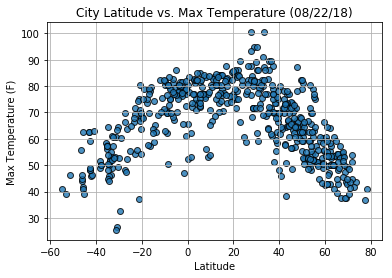

#### Latitude vs. Humidity Plot

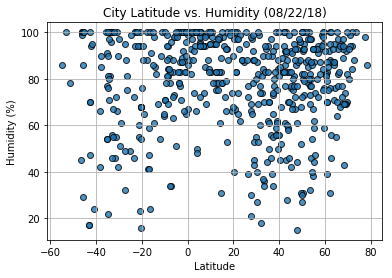

#### Latitude vs. Cloudiness Plot

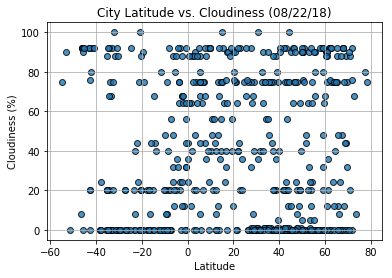

#### Latitude vs. Wind Speed Plot

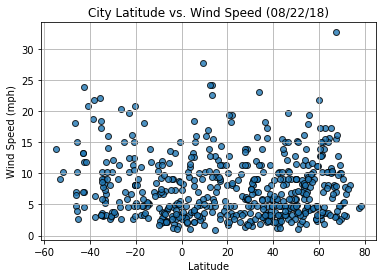